In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

firstData = pd.read_csv("./names/" + "yob1880.txt", sep=",", header=None)
firstData.columns = ['name','sex','num_births']
print(firstData.head())
print(firstData.tail())
#1

        name sex  num_births
0       Mary   F        7065
1       Anna   F        2604
2       Emma   F        2003
3  Elizabeth   F        1939
4     Minnie   F        1746
           name sex  num_births
1995     Woodie   M           5
1996     Worthy   M           5
1997     Wright   M           5
1998       York   M           5
1999  Zachariah   M           5


In [3]:
print(firstData.pivot_table(index=['sex'], values = 'num_births', aggfunc=np.sum))
#2

     num_births
sex            
F         90994
M        110490


In [4]:
dataSort = firstData.sort_values('num_births', ascending=False)
dataSort.head()
#3

,name,sex,num_births
942,John,M,9655
943,William,M,9532
0,Mary,F,7065
944,James,M,5927
945,Charles,M,5348


In [6]:
#want all years after 1999
path, dirs, files = next(os.walk("./names/"))
fileCount = len(files)
dataframe_list = []

for i in range(fileCount):
    tempName = ("./names/" + files[i])
    tempNumber = tempName[11:15]
    if tempNumber.isdigit() == True:
        if int(tempNumber) >= 2000:
            year = int(tempNumber)
            temp_df = pd.read_csv("./names/" + files[i])
            temp_df.columns = ['name','sex','num_births']
            temp_df['year'] = year
            dataframe_list.append(temp_df)
#concat
combined = pd.concat(dataframe_list, axis=0, ignore_index=True)
combined.head()
combined.describe()

#4

,num_births,year
count,687883.000000,687883.000000
mean,112.666564,2010.073851
std,731.965804,5.945025
min,5.000000,2000.000000
25%,7.000000,2005.000000
50%,11.000000,2010.000000
75%,29.000000,2015.000000
max,34483.000000,2020.000000


In [9]:
pivotCombo = combined.pivot_table(index=['year'], columns = 'sex', values = "num_births",  aggfunc=np.sum)
display(pivotCombo)
#5

sex,F,M
year,,
2000,1789585,1963465
2001,1775024,1942320
2002,1771844,1940884
2003,1800834,1974622
2004,1810454,1984098
2005,1823001,1996377
2006,1878781,2054166
2007,1902133,2074249
2008,1870776,2038796


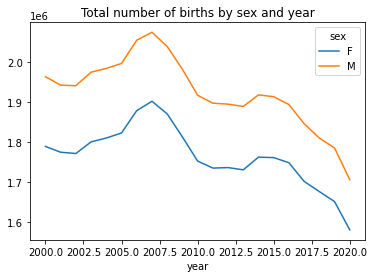

In [11]:
plot1 = pivotCombo.plot(title='Total number of births by sex and year')
#6

In [13]:
pivotName = combined.pivot_table(index=['year'], columns = 'name', values = "num_births",  aggfunc=np.sum, fill_value = 0)
display(pivotName)
#7

name,Aaban,Aabha,Aabid,Aabidah,Aabir,Aabriella,Aada,Aadam,Aadan,Aadarsh,...,Zytaveon,Zytavion,Zytavious,Zyus,Zyva,Zyvion,Zyvon,Zyyanna,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,0,0,0,0,6,0,5,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,11,0,10,...,0,0,6,0,0,0,0,0,0,0
2003,0,0,5,0,0,0,0,10,5,10,...,0,0,0,0,0,0,0,0,0,0
2004,0,0,0,0,0,0,0,9,0,11,...,0,0,6,0,0,0,0,0,0,0
2005,0,0,0,0,0,0,0,6,0,10,...,0,0,5,0,0,0,0,0,0,0
2006,0,0,0,0,0,0,0,9,0,14,...,0,0,7,0,0,0,0,0,0,0
2007,5,0,0,0,0,0,0,8,8,13,...,0,0,6,0,0,0,0,0,0,0
2008,0,0,0,0,0,5,0,6,22,13,...,0,0,0,0,0,0,0,0,0,0


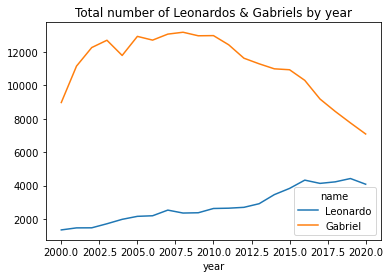

In [15]:
names = pivotName[['Leonardo','Gabriel']]
twoNames = pd.DataFrame(data = names)
plot2 = twoNames.plot(title='Total number of Leonardos & Gabriels by year')
#8

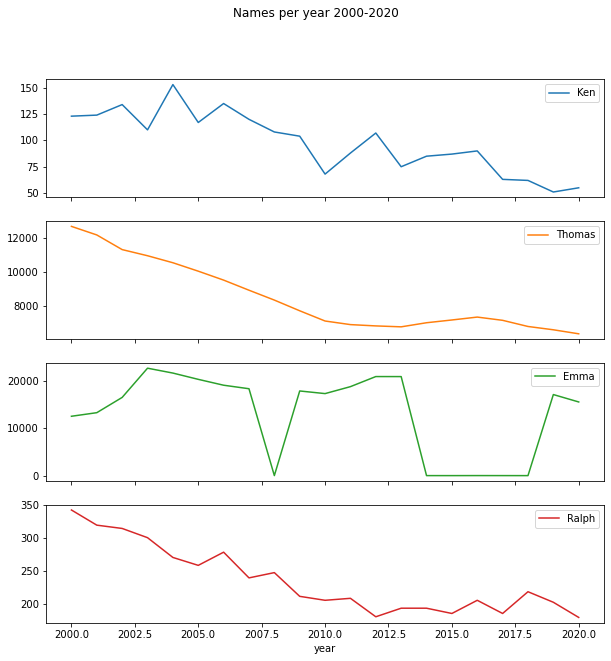

In [16]:
names2 = pivotName[['Ken','Thomas','Emma','Ralph']]
nameDF = pd.DataFrame(data = names2)
plot3 = nameDF.plot(subplots=True, figsize=(10, 10), title='Names per year 2000-2020')
#9

In [17]:
pivotNew = combined.pivot_table(index=['name','sex'], values = 'num_births',  aggfunc=np.sum)
pivotNew.head()
#10

,,num_births
name,sex,
Aaban,M,120
Aabha,F,46
Aabid,M,16
Aabidah,F,5
Aabir,M,10


In [18]:
dataSort2 = pivotNew.sort_values("num_births", ascending=False)
dataSort2.head(500)
#11

,,num_births
name,sex,
Jacob,M,446065
Michael,M,405151
William,M,366566
Ethan,M,360167
Matthew,M,354461
...,...,...
Eliza,F,29634
Kiara,F,29390
Lorenzo,M,29369


In [20]:
sortReset = dataSort2.reset_index()
display(sortReset)
#12

,name,sex,num_births
0,Jacob,M,446065
1,Michael,M,405151
2,William,M,366566
3,Ethan,M,360167
4,Matthew,M,354461
...,...,...,...
77193,Larreon,M,5
77194,Larren,M,5
77195,Larren,F,5
77196,Ameriana,F,5


In [21]:
maleNames = sortReset[sortReset.sex == "M"]
maleDF = pd.DataFrame(data = maleNames).head(5)
display(maleDF)

femaleNames = sortReset[sortReset.sex == "F"]
femaleDF = pd.DataFrame(data = femaleNames).head(5)
display(femaleDF)
#13

,name,sex,num_births
0,Jacob,M,446065
1,Michael,M,405151
2,William,M,366566
3,Ethan,M,360167
4,Matthew,M,354461


,name,sex,num_births
9,Olivia,F,321801
16,Madison,F,297651
17,Isabella,F,286630
19,Abigail,F,277225
20,Emma,F,273287


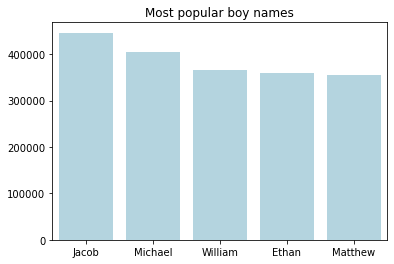

In [25]:
title = 'Most popular boy names'
sns.barplot(x='name', y='num_births', data=maleDF, color = 'lightblue').set(title='Most popular boy names', xlabel=None, ylabel=None)
#14

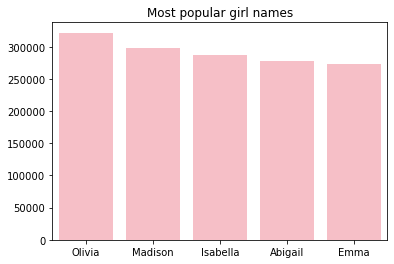

In [26]:
title = 'Most popular boy names'
sns.barplot(x='name', y='num_births', data=femaleDF, color = 'lightpink').set(title='Most popular girl names', xlabel=None, ylabel=None)
#15